In [1]:
import numpy as np
import pandas as pd
import os
import subprocess
import time
import matplotlib.pyplot as plt
import itertools
from copy import deepcopy
import sys

from rdkit import Chem
from rdkit.Chem import AllChem
import ase
from ase.io import read, write
from ase.units import Hartree
from ase.visualize import view

from ase.io.trajectory import Trajectory
import glob
import pickle

from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

In [ ]:
from photocatalysis.thermodynamics.helpers import get_batches

In [2]:
### For automatically reloading import modules... allows you to run changes to code in jupyter without having to reload
%load_ext autoreload
%autoreload 2

In [ ]:
os.chdir('/home/btpq/bt308495/Thesis/run/learner_results_Batch4/')

In [ ]:
initial = pd.read_json('/home/btpq/bt308495/Thesis/Batch4.json', orient='split')

In [ ]:
mol_indx = [i for i, _ in initial.iterrows()]

In [ ]:
res = os.listdir('molecules_to_calculate_results')

In [ ]:
fiz = [ int(x.split('.')[0].split('mol_')[-1]) for i,x in enumerate(res) if '__fizzled' in x]
runn = [ int(x.split('.')[0].split('mol_')[-1]) for i,x in enumerate(res) if '__running' in x]

In [ ]:
i = [mol_indx.index(f) for f in fiz]

In [ ]:
os.path.join(res[0], 'errors.txt')

In [ ]:
p = []
for r in res:
    if '__fizzled' in r:
        error_path = os.path.join('molecules_to_calculate_results', r, 'errors.txt')
        with open(error_path, 'rb') as file:
            p.append([r, file.read().decode('UTF-8')])


In [ ]:
for mol, error in p:
    print(mol)
    print(error)
    print('#####################################')

In [ ]:
file_exists = []
for mol, error in p:
    for line in error.splitlines():
        if '[Errno 17]' in line:
            file_exists.append([mol, line])

In [ ]:
file_exists[0][0]

In [ ]:
res.index(file_exists[0][0])

---

In [ ]:
from photocatalysis.learners_treesearch import get_results, update_population_frame

In [ ]:
g = update_population_frame(initial, 50, 50, 0)

In [ ]:
g.loc[g.calc_status == 'fizzled', 'calc_status'] = 'not_written'

In [ ]:
g.loc[g.calc_status == 'running', 'calc_status'] = 'not_written'

In [ ]:
g.to_json('/home/btpq/bt308495/Thesis/Batch4_halfway.json', orient='split')

----

In [3]:
b1 = pd.read_json('/home/btpq/bt308495/Thesis/run/DF_BATCH1.json', orient='split')
b2 = pd.read_json('/home/btpq/bt308495/Thesis/run/DF_BATCH2.json', orient='split')
b3 = pd.read_json('/home/btpq/bt308495/Thesis/run/DF_BATCH3.json', orient='split')
b4 = pd.read_json('/home/btpq/bt308495/Thesis/run/DF_BATCH4.json', orient='split')

In [4]:
bt2 = pd.read_csv('/home/btpq/bt308495/Thesis/run/learner_results_Batch2/batch_times.txt', sep=' ', header=None)
bt3 = pd.read_csv('/home/btpq/bt308495/Thesis/run/learner_results_Batch3/batch_times.txt', sep=' ', header=None)
bt4 = pd.read_csv('/home/btpq/bt308495/Thesis/run/learner_results_Batch4/batch_times.txt', sep=' ', header=None)

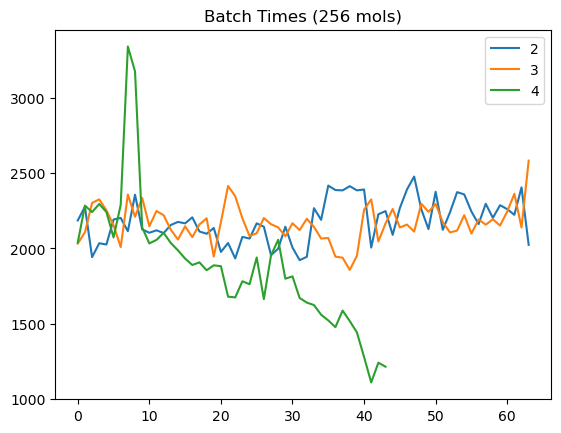

In [5]:
bt2[1][:-1].plot(label=2)
bt3[1][:-1].plot(label=3)
bt4[1][:-1].plot(label=4)
plt.title('Batch Times (256 mols)')
plt.legend()

In [6]:
len(set((*b1.molecule_smiles.values, *b2.molecule_smiles.values, *b3.molecule_smiles.values, *b4.molecule_smiles.values))), b1.shape[0]+b2.shape[0]+b3.shape[0]+b4.shape[0]

(65552, 65552)

In [7]:
for b in [b1, b2, b3, b4]:
    tot = b.shape[0]
    print("BATCH ************")
    print("Num Fizzled {} / {}".format(b.loc[b.calc_status == 'fizzled'].shape[0], tot))
    print("Num Water splitting: {} / {}".format(b.loc[b.utility_function > 0].shape[0], tot))

BATCH ************
Num Fizzled 342 / 16388
Num Water splitting: 201 / 16388
BATCH ************
Num Fizzled 422 / 16388
Num Water splitting: 177 / 16388
BATCH ************
Num Fizzled 350 / 16388
Num Water splitting: 366 / 16388
BATCH ************
Num Fizzled 296 / 16388
Num Water splitting: 842 / 16388


In [9]:
b = pd.concat([b1, b2, b3, b4])

In [24]:
b.loc[b.utility_function > 0].shape

(1586, 12)

In [31]:
output = pd.read_json('/home/btpq/bt308495/Thesis/DF_INCOMPLETE.json', orient='split')

In [28]:
b.to_json('/home/btpq/bt308495/Thesis/DF_COMPLETE.json', orient='split')

-----

In [ ]:
### For automatically reloading import modules... allows you to run changes to code in jupyter without having to reload
%load_ext autoreload
%autoreload 2

# Read Dataframe containing entire chemical space
# path = os.getcwd() + '/data/'
# file = 'df_chemical_space_chons_4rings.json'
# p = pd.read_json(path+file, orient='split')

path = '/home/btpq/bt308495/Thesis/osc_discovery/data/df_chemical_space_chons_4rings.json'
p = pd.read_json(path, orient='split')

# Change dir
# os.chdir('/home/scakolli/Thesis/osc_discovery/run')
os.chdir('/home/btpq/bt308495/Thesis/run')
# sys.path.insert(1, '/home/btpq/bt308495/Thesis/')

In [ ]:
output = pd.read_json('/home/btpq/bt308495/Thesis/run/DF_4096.json', orient='split')

In [ ]:
output.loc[output.calc_status == 'fizzled'].shape

In [ ]:
output

In [ ]:
output.tail()

----

In [ ]:
MAIN_COMPLETED = pd.read_json('/home/btpq/bt308495/Thesis/DF_COMPLETE.json', orient='split')

In [ ]:
batches_size = MAIN_COMPLETED.shape[0]//4

In [ ]:
B1 = MAIN_COMPLETED.iloc[:batches_size]
B2 = MAIN_COMPLETED.iloc[batches_size:2*batches_size]
B3 = MAIN_COMPLETED.iloc[2*batches_size:3*batches_size]
B4 = MAIN_COMPLETED.iloc[3*batches_size:]

In [ ]:
B1.to_json('/home/btpq/bt308495/Thesis/Batch1.json', orient='split')
B2.to_json('/home/btpq/bt308495/Thesis/Batch2.json', orient='split')
B3.to_json('/home/btpq/bt308495/Thesis/Batch3.json', orient='split')
B4.to_json('/home/btpq/bt308495/Thesis/Batch4.json', orient='split')

In [ ]:
testing = MAIN.copy()

In [ ]:
for j, res in output.iterrows():
    testing.loc[testing.molecule_smiles == res.molecule_smiles, ['IP', 'dGmax', 'calc_status']] = res[['IP', 'dGmax', 'calc_status']].values

In [ ]:
testing.to_json('/home/btpq/bt308495/Thesis/DF_COMPLETE.json', orient='split')

In [ ]:
from photocatalysis.learners_treesearch import get_unique_population

In [ ]:
MAIN = get_unique_population(MAIN)

In [ ]:
MAIN.to_json('/home/btpq/bt308495/Thesis/DF_INCOMPLETE.json', orient='split')

In [ ]:
os.getcwd()

In [ ]:
MAIN = pd.read_json('/home/btpq/bt308495/Thesis/DF_INCOMPLETE.json', orient='split')

In [ ]:
MAIN.iloc[4096:2*4096].to_json('/home/btpq/bt308495/Thesis/DF_INCOMPLETE_0to4096.json', orient='split')

In [ ]:
MAIN['added_in_round'] = MAIN['generation']

In [ ]:
MAIN['calc_status'] = 'not_written'

In [ ]:
MAIN.to_json('/home/btpq/bt308495/Thesis/DF_INCOMPLETE.json', orient='split')

In [ ]:
m = pd.read_json('/home/btpq/bt308495/Thesis/osc_discovery/data/df_initial_gfn1_testspace.json', orient='split')

In [ ]:
p

In [ ]:
main_frame = p.copy().drop(columns=['XTB1_lamda_h', 'ehomo_gfn1_b3lyp']) # drop old descriptors
main_frame.insert(4, 'IP', np.nan)
main_frame.insert(5, 'dGmax', np.nan)


In [ ]:
main_frame.to_json('DF_INCOMPLETE.json', orient='split')

In [ ]:
# Pick a random molecule in the space and get its smile string
rand_i = np.random.randint(315451)
smi = p.iloc[rand_i]['molecule_smiles']
# smi = 'C1=CC(C=Cc2cnnc(-c3cc(C=CC4=CCC=C4)cnn3)c2)=CC1'
# smi = 'C1=CSC(=C2C(C=Cc3ccco3)=CC=C2C=Cc2ccco2)S1'

# Draw chem
# p.iloc[rand_i]
rdkit_smi = Chem.AddHs(Chem.MolFromSmiles(smi))
rdkit_smi

In [ ]:
os.chdir('/home/btpq/bt308495/Thesis/run')

-----

In [ ]:
from photocatalysis.adsorption.tools import multi_prepare_substrate
from photocatalysis.adsorption.relaxing import build_and_relax_configurations
from photocatalysis.thermodynamics.thermodynamics import multi_get_thermodynamics, global_min_configurations, free_energies

from photocatalysis.evaluate import evaluate_substrate
from photocatalysis.thermodynamics.helpers import get_batches

In [ ]:
calc_params = {'gfn':2, 'acc':0.2, 'etemp':298.15, 'strict':'', 'gbsa':'water'}
rand_smi = np.random.randint(0, 315450, size=32)
smile_strings = p.molecule_smiles.iloc[rand_smi].tolist()

In [ ]:
# Introduce errors
smile_strings[1] = None

In [ ]:
subs, errors = multi_prepare_substrate(smile_strings, calc_kwargs=calc_params)

In [ ]:
systems = []
for j, sub in enumerate(subs):
    print(f'Iter {j}')
    systems.append([sub, *build_and_relax_configurations(sub, sub.info['equivalent_atoms'])])

In [ ]:
props, errors_props = multi_get_thermodynamics(systems)
ips = [s.info['ip'] for s in subs]

Parallel (11.3 sec / mol)

In [ ]:
start = time.perf_counter()
subs, errors = multi_prepare_substrate(smile_strings, calc_kwargs=calc_params)

systems = []
for j, sub in enumerate(subs):
    print(f'Iter {j}')
    systems.append([sub, *build_and_relax_configurations(sub, sub.info['equivalent_atoms'])])

props, errors_props = multi_get_thermodynamics(systems)
ips = [s.info['ip'] for s in subs]
print('Took:', time.perf_counter() - start)

Serial (19.7 sec / mol)

In [ ]:
start = time.perf_counter()
outs = []
for j, s in enumerate(smile_strings):
    print(f'Iter {j}')
    outs.append(evaluate_substrate(s, calc_params))

print('Took:', time.perf_counter() - start)

-----

In [ ]:
from photocatalysis.adsorption.tools import prepare_substrate
from photocatalysis.thermodynamics.tools import single_run, multi_run
from photocatalysis.thermodynamics.constants import dG1_REST, dG2_REST, dG3_REST, dG4_REST, SHE_VACUUM_POTENTIAL

In [ ]:
# from photocatalysis.adsorption.tools import build_configurations, get_adsorbate_conformers
# from photocatalysis.adsorption.optimal_configurations import filter_configurations_with_symm, filter_configurations

In [ ]:
def free_energy_multidim(Gs, GOH, GO, GOOH, explicitly_broadcast=True):
    # Vectorized free energy expressions with numpy broadcasting
    # Gs : scalar, G*: arbitrary length numpy array
    # (OH_index, O_index, OOH_index)
    
    g1 = GOH[:, None, None] - Gs + dG1_REST
    g2 = GO[None, :, None] - GOH[:, None, None] + dG2_REST
    g3 = GOOH[None, None, :] - GO[None, :, None] + dG3_REST
    g4 = Gs - GOOH[None, None, :] + dG4_REST
    
    if explicitly_broadcast:
        tot_shape = len(GOH), len(GO), len(GOOH)
        g1b, g2b, g3b, g4b = explicitly_broadcast_to(tot_shape, g1, g2, g3, g4)
        G = np.moveaxis(np.array((g1b, g2b, g3b, g4b)), 0,3)
        return G
    else:
        return g1, g2, g3, g4

def explicitly_broadcast_to(shape, *gs_expres):
    # Fillout arrays
    out = []
    for g in gs_expres:
        out.append(np.broadcast_to(g, shape))
    return tuple(out)

In [ ]:
def grouped_by_sym(metric, sym_groupings):
    metric_grouped = [[metric[i] for i in symgroup] for symgroup in sym_groupings]
    return metric_grouped

def clean_configs_with_nans(configs):
    # Take a list of configs and resort them according to activesite, fill rest with nans...
    # makes accessing by acvt site indx easy
    d = dict.fromkeys(sub.info['nonH_atoms'], np.nan)
    cs = deepcopy(configs)

    for config in cs:
        actv = config.info['active_site']
        d[actv] = config

    return list(d.values())

In [ ]:
# Prepare Substrate
calc_params = {'gfn':2, 'acc':0.2, 'etemp':298.15, 'strict':'', 'gbsa':'water'}
# sub = prepare_substrate(smi, calc_params, multi_process_conf=2, multi_process_sp=4)

In [ ]:
from photocatalysis.conformers import get_conformers_rdkit as get_conformers

In [ ]:
substrate_confs = get_conformers(smi, n_cpu=4, print_output=False)
substrate = substrate_confs.pop(0) # Lowest energy conf

In [ ]:
# sub = single_run(substrate, runtype='opt', **calc_params)
sub = single_run(substrate, runtype='ohess', **calc_params, pop='')

### Walltimes and cputimes

In [ ]:
swt, sct = sub.info['walltime'], sub.info['cputime']

In [ ]:
wt, ct = [], []
cores = [i for i in range(1, 17)]
for c in cores:
    sub = single_run(substrate, runtype='ohess', **calc_params, pop='', parallel=c)
    wt.append(sub.info['walltime'])
    ct.append(sub.info['cputime'])

In [ ]:
plt.plot(cores, swt / (np.array(wt) * np.array(cores)))
plt.title('Parallel Efficiency')

In [ ]:
plt.plot(cores, np.array(ct)/np.array(wt))
plt.plot(cores, cores)
plt.title('Speed Up Ratio')

In [ ]:
plt.plot(cores, np.array(ct) / np.array(cores))
plt.plot(cores, np.array(wt))
plt.title('Cputime/core')

### Batch vs serial processing

In [ ]:
import multiprocessing as mp

In [ ]:
from photocatalysis.adsorption.tools import prepare_substrate_batch, prepare_substrate, multi_prepare_substrate
from photocatalysis.adsorption.relaxing import build_and_relax_configurations

In [ ]:
from functools import partial
from itertools import repeat

In [ ]:
def get_batches(lst, num_batches):
    return [lst[i:i + num_batches] for i in range(0, len(lst), num_batches)]

In [ ]:
rand_smi = np.random.randint(0, 315450, size=128)

In [ ]:
batches = get_batches(p.molecule_smiles.iloc[rand_smi].tolist(), 24)

In [ ]:
batches[0]

In [ ]:
test = prepare_substrate_batch(batches[0], calc_params)

In [ ]:
test2 = multi_prepare_substrate(batches[0], calc_kwargs=calc_params, multi_process=-1)

In [ ]:
systems = []
for t in test2:
    oh, o, ooh = build_and_relax_configurations(t, t.info['equivalent_atoms'], optlevel='loose', multi_process=-1, additional_conformers=False)
    systems.append([t, oh, o, ooh])

In [ ]:
from photocatalysis.evaluate import multi_calculate_thermochemistry

In [ ]:
test3 = multi_calculate_thermochemistry(systems, multi_process=-1)

In [ ]:
test3

-----

In [ ]:
substrates = [get_conformers(s, n_cpu=8)[0] for s in p.molecule_smiles.iloc[rand_smi]]

In [ ]:
### 48 secs to beat for serial/parallel 32
with mp.Pool(32) as pool:
    sub_test = pool.map(get_conformers, p.molecule_smiles.iloc[rand_smi].tolist())

In [ ]:
test = [single_run(s, runtype='opt', **calc_params, parallel=8) for s in subs]

In [ ]:
test2 = multi_run(subs, runtype='opt normal', calc_kwargs=calc_params)

In [ ]:
optlevels = ['loose', 'lax', 'normal', 'tight', 'vtight', 'extreme']
ips = []

for o in optlevels:
    print(o)
    subs = multi_run(substrates, runtype=f'opt {o}', calc_kwargs=calc_params)
    subs = multi_run(subs, runtype='vipea', calc_kwargs=calc_params)

    ips.append([s.info['ip'] for s in subs])

In [ ]:
ips = np.array(ips)

In [ ]:
plt.plot(ips - ips[0, :])

## All sites

### Complete relaxation

In [ ]:
start = time.perf_counter()

### Build
configsOH, configsO, configsOOH = build_configurations(sub, key='nonH_atoms')

### Relax
oh_all = multi_run(configsOH, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
o_all = multi_run(configsO, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
ooh_all = multi_run(configsOOH, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)

### Filter
oh_all = filter_configurations(oh_all, sub)
o_all = filter_configurations(o_all, sub)
ooh_all = filter_configurations(ooh_all, sub)

### Info
print("Num configs", len(oh_all), len(o_all), len(ooh_all))
print("Relaxation Took", time.perf_counter()-start)

### ZPE, TS

In [ ]:
start = time.perf_counter()

### Hessian
oh_all = multi_run(oh_all, runtype='hess', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
o_all = multi_run(o_all, runtype='hess', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
ooh_all = multi_run(ooh_all, runtype='hess', keep_folders=False, calc_kwargs=calc_params, multi_process=6)

### Info
print("Total Time", time.perf_counter()-start)

In [ ]:
### All information
oh_nan, o_nan, ooh_nan = clean_configs_with_nans(oh_all), clean_configs_with_nans(o_all), clean_configs_with_nans(ooh_all)

eoh_nan = [config.info['energy'] if config is not np.nan else np.nan for config in oh_nan]
eo_nan = [config.info['energy'] if config is not np.nan else np.nan for config in o_nan]
eooh_nan = [config.info['energy'] if config is not np.nan else np.nan for config in ooh_nan]

zpeoh_nan = np.array([config.info['zpe'] if config is not np.nan else np.nan for config in oh_nan])
zpeo_nan = np.array([config.info['zpe'] if config is not np.nan else np.nan for config in o_nan])
zpeooh_nan = np.array([config.info['zpe'] if config is not np.nan else np.nan for config in ooh_nan])

soh_nan = np.array([config.info['entropy'] if config is not np.nan else np.nan for config in oh_nan])
so_nan = np.array([config.info['entropy'] if config is not np.nan else np.nan for config in o_nan])
sooh_nan = np.array([config.info['entropy'] if config is not np.nan else np.nan for config in ooh_nan])

In [ ]:
es = sub.info['energy']
zpes = sub.info['zpe']
ss = sub.info['entropy']

In [ ]:
eoh_all = [config.info['energy'] if config is not np.nan else np.nan for config in oh_all]
eo_all = [config.info['energy'] if config is not np.nan else np.nan for config in o_all]
eooh_all = [config.info['energy'] if config is not np.nan else np.nan for config in ooh_all]

zpeoh_all = np.array([config.info['zpe'] if config is not np.nan else np.nan for config in oh_all])
zpeo_all = np.array([config.info['zpe'] if config is not np.nan else np.nan for config in o_all])
zpeooh_all = np.array([config.info['zpe'] if config is not np.nan else np.nan for config in ooh_all])

soh_all = np.array([config.info['entropy'] if config is not np.nan else np.nan for config in oh_all])
so_all = np.array([config.info['entropy'] if config is not np.nan else np.nan for config in o_all])
sooh_all = np.array([config.info['entropy'] if config is not np.nan else np.nan for config in ooh_all])

In [ ]:
### Grouping for equivalent sites
qs_grouped = grouped_by_sym(sub.info['qs'], sub.info['equivalent_atoms_grouped'])

eoh_grouped = grouped_by_sym(eoh_nan, sub.info['equivalent_atoms_grouped'])
eo_grouped = grouped_by_sym(eo_nan, sub.info['equivalent_atoms_grouped'])
eooh_grouped = grouped_by_sym(eooh_nan, sub.info['equivalent_atoms_grouped'])

zpeoh_grouped = grouped_by_sym(zpeoh_nan, sub.info['equivalent_atoms_grouped'])
zpeo_grouped = grouped_by_sym(zpeo_nan, sub.info['equivalent_atoms_grouped'])
zpeooh_grouped = grouped_by_sym(zpeooh_nan, sub.info['equivalent_atoms_grouped'])

soh_grouped = grouped_by_sym(soh_nan, sub.info['equivalent_atoms_grouped'])
so_grouped = grouped_by_sym(so_nan, sub.info['equivalent_atoms_grouped'])
sooh_grouped = grouped_by_sym(sooh_nan, sub.info['equivalent_atoms_grouped'])

## Equivalent sites

In [ ]:
mol = Chem.MolFromSmiles(smi)
mol.__sssAtoms = [*sub.info['equivalent_atoms']]
mol

In [ ]:
sub.info['equivalent_atoms']

In [ ]:
print("Max diff in Energy (eV)")
print(np.nanmax([max(g) - min(g) for g in eoh_grouped]), np.nanmax([max(g) - min(g) for g in eo_grouped]), np.nanmax([max(g) - min(g) for g in eooh_grouped]))

In [ ]:
print("Max diff in zpe (eV)")
print(np.nanmax([max(g) - min(g) for g in zpeoh_grouped]), np.nanmax([max(g) - min(g) for g in zpeo_grouped]), np.nanmax([max(g) - min(g) for g in zpeooh_grouped]))

In [ ]:
print("Max diff in entropy (eV)")
print(np.nanmax([max(g) - min(g) for g in soh_grouped]), np.nanmax([max(g) - min(g) for g in so_grouped]), np.nanmax([max(g) - min(g) for g in sooh_grouped]))

In [ ]:
for g, e in zip(qs_grouped, sub.info['equivalent_atoms_grouped']):
    print(e, '|', max(g) - min(g))

Variation probably due to an actual difference in 3D environment, but also conformational and optimization related influences.

This approximation breaks down if the 2 supposedly equivalent sites have substantially different electronic environments. Errors on the order of 0.1-0.2 eV.

Charge difference heuristic max(qs) - min(qs) < 0.001 C.

### Complete relaxation

In [ ]:
### Build Configs
configsOH, configsO, configsOOH = build_configurations(sub, key='equivalent_atoms')

In [ ]:
start = time.perf_counter()
oh = multi_run(configsOH, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
o = multi_run(configsO, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
ooh = multi_run(configsOOH, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)

In [ ]:
### Filtering
oh = filter_configurations_with_symm(oh, sub)
o = filter_configurations_with_symm(o, sub)
ooh = filter_configurations_with_symm(ooh, sub)
print("Num configs", len(oh), len(o), len(ooh))
print("Took", time.perf_counter()-start)

### Crude, filter, then full relaxation

In [ ]:
### Crude Relaxation
start = time.perf_counter()
oh_crude = multi_run(configsOH, runtype='opt sloppy', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
o_crude = multi_run(configsO, runtype='opt sloppy', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
ooh_crude = multi_run(configsOOH, runtype='opt sloppy', keep_folders=False, calc_kwargs=calc_params, multi_process=6)

In [ ]:
### Filtering
oh_crude = filter_configurations_with_symm(oh_crude, sub)
o_crude = filter_configurations_with_symm(o_crude, sub)
ooh_crude = filter_configurations_with_symm(ooh_crude, sub)
print("Num configs", len(oh_crude), len(o_crude), len(ooh_crude))

In [ ]:
### Subsequent full Relaxation
oh_crude_full = multi_run(oh_crude, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
o_crude_full = multi_run(o_crude, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
ooh_crude_full = multi_run(ooh_crude, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)

In [ ]:
### Filtering
oh_crude_full = filter_configurations_with_symm(oh_crude_full, sub)
o_crude_full = filter_configurations_with_symm(o_crude_full, sub)
ooh_crude_full = filter_configurations_with_symm(ooh_crude_full, sub)
print("Num configs", len(oh_crude_full), len(o_crude_full), len(ooh_crude_full))
print("Took", time.perf_counter()-start)

Its often apparent early in the relaxation whether a site is stable or not (whether it destroys the substrate or volatalizes off the site). Prune redundant and unstable configurations early in the relaxation.

1. Double O configs are common
2. Volatization to another site is common
3. No need to further optimize a destroyed substrate

In [ ]:
eoh = np.array([t.info['energy'] for t in oh])
eo = np.array([t.info['energy'] for t in o])
eooh = np.array([t.info['energy'] for t in ooh])

eoh_crude = np.array([t.info['energy'] for t in oh_crude])
eo_crude = np.array([t.info['energy'] for t in o_crude])
eooh_crude = np.array([t.info['energy'] for t in ooh_crude])

asoh = [t.info['active_site'] for t in oh]
aso = [t.info['active_site'] for t in o]
asooh = [t.info['active_site'] for t in ooh]

activesites = [[i, j, k] for i, j, k in itertools.product(asoh, aso, asooh)]
activesites = np.array(activesites).reshape(len(asoh), len(aso), len(asooh), 3)
eoh_crude = np.delete(eoh_crude, 5)

### Generating additional adsorbate configurations

Force fields turn out to be not so good for geometries... but still useful for gnerating addition conformations

In [ ]:
# Generate additional conformers, and optimize them with ff's
start = time.perf_counter()
add_oh_confs = [get_adsorbate_conformers(config) for config in oh]
add_o_confs = [get_adsorbate_conformers(config) for config in o]
add_ooh_confs = [get_adsorbate_conformers(config) for config in ooh]
print("Took", time.perf_counter() - start)

In [ ]:
# Relax them at tight binding level
add_oh = multi_run(add_oh_confs, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
add_o = multi_run(add_o_confs, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
add_ooh = multi_run(add_ooh_confs, runtype='opt vtight', keep_folders=False, calc_kwargs=calc_params, multi_process=6)

In [ ]:
# Filter and update
oh_opt = filter_configurations(oh + add_oh, sub)
o_opt = filter_configurations(o + add_o, sub)
ooh_opt = filter_configurations(ooh + add_ooh, sub)
print("Took Total", time.perf_counter() - start)

In [ ]:
eoh_opt = np.array([t.info['energy'] for t in oh_opt])
eo_opt = np.array([t.info['energy'] for t in o_opt])
eooh_opt = np.array([t.info['energy'] for t in ooh_opt])

In [ ]:
print('Num configs', len(oh), len(o), len(ooh))
print('New configs', np.count_nonzero(eoh_opt - eoh < 0), np.count_nonzero(eo_opt - eo < 0), np.count_nonzero(eooh_opt - eooh < 0))

In [ ]:
print('Min difference (eV)')
print(np.min(eoh_opt - eoh), np.min(eo_opt - eo), np.min(eooh_opt - eooh))

Generating additional conformations with EKTG/FFs leads to better sampling of the PES for a given active site.. but it essentially requires double the computational time. Can resolve errors on the order of ~0.1 eV.

### Free Energy and overpotentials

#### ZPE, TS

In [ ]:
start = time.perf_counter()

### Hessian
oh = multi_run(oh, runtype='hess', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
o = multi_run(o, runtype='hess', keep_folders=False, calc_kwargs=calc_params, multi_process=6)
ooh = multi_run(ooh, runtype='hess', keep_folders=False, calc_kwargs=calc_params, multi_process=6)

### Info
print("Total Time", time.perf_counter()-start)

In [ ]:
# Info
zpeoh = np.array([config.info['zpe'] if config is not np.nan else np.nan for config in oh])
zpeo = np.array([config.info['zpe'] if config is not np.nan else np.nan for config in o])
zpeooh = np.array([config.info['zpe'] if config is not np.nan else np.nan for config in ooh])

soh = np.array([config.info['entropy'] if config is not np.nan else np.nan for config in oh])
so = np.array([config.info['entropy'] if config is not np.nan else np.nan for config in o])
sooh = np.array([config.info['entropy'] if config is not np.nan else np.nan for config in ooh])

#### with (ZPE-TS) correction

enumerating active sites... lowest overpotential site would be our active site?

In [ ]:
# Free energies
gs = es + zpes - ss
goh = eoh + zpeoh - soh
go = eo + zpeo - so
gooh = eooh + zpeooh - sooh

# G matrix, MAD, overpot, rate determining step
G = free_energy_multidim(gs, goh, go, gooh)
overpot = G.max(axis=3) - 1.23
mad = abs(G-1.23).sum(axis=3)
spread = G.max(axis=3) - G.min(axis=3)
rds = G.argmax(axis=3)

# Sorting
arg_0 = np.unravel_index(overpot.argsort(axis=None, kind='stable'), overpot.shape)
indxs_0 = np.dstack(arg_0)[0]

In [ ]:
eoh_crude.argmin(), eo_crude.argmin(), eooh_crude.argmin()

In [ ]:
stable_indx = eoh.argmin(), eo.argmin(), eooh.argmin()
stable_indx_zpets = goh.argmin(), go.argmin(), gooh.argmin()
stable_indx

In [ ]:
G[stable_indx].max()

In [ ]:
# unravled_argsorted_overpot = np.unravel_index(argsorted_overpot, overpot.shape)
# lexargsorted_overpot_then_mad = np.lexsort((mad.flatten()[argsorted_overpot], overpot.flatten()[argsorted_overpot]))
# argsorted_overpot_then_mad = argsorted_overpot[lexargsorted_overpot_then_mad]
# unraveled_argsorted_overpot_then_mad = np.unravel_index(argsorted_overpot_then_mad, overpot.shape)

In [ ]:
indxs_0[0], overpot[*indxs_0[0]]

In [ ]:
G[0,1,2]

In [ ]:
for config_index in indxs_0:
    print(config_index, '|', overpot[*config_index], '|', rds[*config_index])

#### visualizing sites

In [ ]:
from rdkit.Chem import Draw
import ast

In [ ]:
def mol_with_specific_atom_index(mol, indices=None):
    if indices is not None:
        for atom in mol.GetAtoms():
            if atom.GetIdx() in indices:
                atom.SetAtomMapNum(atom.GetIdx())
    else:
        for atom in mol.GetAtoms():
            atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [ ]:
def config_num_to_activesite_numerized(arguments):
    # np.dstacked (Nx3) array of config indices as input
    out = []
    for argg in arguments:
        if isinstance(aso[argg[1]], str):
            a = list((asoh[argg[0]], *ast.literal_eval(aso[argg[1]]), asooh[argg[2]]))
        else:
            a = list((asoh[argg[0]], aso[argg[1]], asooh[argg[2]]))
        
        c = [int(b) for b in a]
        out.append(c)
    
    return out

In [ ]:
N = 300

args = indxs_0[:N:20]
# args = np.dstack(unraveled_argsorted_overpot_then_mad)[0][:N:20]
# args = activesites[argsorted_overpot][:N]
# args = argsorted_overpot_then_mad[:N:20]

l = []
ms = []
for arg in args:
    overpotential = overpot[*arg]
    meanabsdiff = mad[*arg]
    #overpotential = overpot.flatten()[arg]
    #meanabsdiff = mad.flatten()[arg]
    
    # |as:{arg[0], arg[1], arg[2]}, 
    l.append(f'|over:{round(overpotential, 4)}eV, mad:{round(meanabsdiff, 4)}|')
    
    m = deepcopy(rdkit_smi)
    #m.GetAtomWithIdx(int(arg[0])).SetProp('atomNote', 'OH')
    #m.GetAtomWithIdx(int(arg[1])).SetProp('atomNote', 'O')
    #m.GetAtomWithIdx(int(arg[2])).SetProp('atomNote', 'OOH')
    m = Chem.RemoveHs(m)
    #asite = activesites[np.unravel_index(arg, overpot.shape)].astype(int)
    asite = activesites[*arg]
    #m = mol_with_specific_atom_index(m, indices=[*asite])
    ms.append(m)

In [ ]:
overpot.max()

In [ ]:
Draw.MolsToGridImage(ms, legends=l, highlightAtomLists=config_num_to_activesite_numerized(indxs_0), subImgSize=(500,500))

What do we count as an active site exactly? Far apart configurations also work?

#### w/o ZPE-TS correction

In [ ]:
gs = es
goh = eoh
go = eo
gooh = eooh

Gcrude = free_energy_multidim(gs, goh, go, gooh)
overpotcrude = Gcrude.max(axis=3) - 1.23
rdscrude = Gcrude.argmax(axis=3)

In [ ]:
arg_1 = np.unravel_index(overpotcrude.argsort(axis=None, kind='stable'), overpotcrude.shape)
indxs_1 = np.dstack(arg_1)[0]

In [ ]:
for config_index in indxs_1:
    print(config_index, '|', overpotcrude[*config_index], '|', rdscrude[*config_index])

In [ ]:
indxs_0[0], overpot[*indxs_0[0]]

#### ZPE-TS distb

In [ ]:
corr1 = (zpeoh - soh) - (zpes - ss)
corr2 = (zpeo - so) - (zpeoh - soh)[:, None]
corr3 = (zpeooh - sooh) - (zpeo - so)[:, None]
corr4 = (zpes - ss) - (zpeooh - sooh)

In [ ]:
plt.hist(corr1, label='1')
plt.hist(corr2.flatten(), label='2')
plt.hist(corr3.flatten(), label='3')
plt.hist(corr4, label='4')
plt.legend()

In [ ]:
zpe_s_loop(es, eoh, eo, eooh)

#### Not fully relaxed

In [ ]:
zpe_s_loop(es, eoh_crude, eo_crude, eooh_crude)

1) Fully Relaxing 28*3 configs took 184 sec, Frequency analysis on 21*14*15 configs took 235 sec
2) Relaxing 15*3 equivalent configs took 108 sec, Freq. analysis on 11*8*8 configs took 133
2a) Stop and go relaxing 15*15*15 / 12*8*8 equivalent configs took 82 sec
3) Generating addition FF confs and relaxing them, 75 sec

75sec (conf generation)
1) 419sec (full, 100%) 
2) 241sec (Equivalent, 57%)
3) 215sec (stop and go, 51%)
4) 40 sec + 20 sec ZPEs + 20 sec relax (crude, 19%)

In [ ]:
gs = es #+ ss - zpes
goh = eoh_crude #+ zpeoh - soh
go = eo_crude #+ zpeo - so
gooh = eooh_crude #+ zpeooh - sooh

Gcrude = free_energy_multidim(gs, goh, go, gooh)
overpotcrude = Gcrude.max(axis=3) - 1.23
rdscrude = Gcrude.argmax(axis=3)

In [ ]:
np.mean(eoh_crude - eoh), np.mean(eo_crude - eo), np.mean(eooh_crude - eooh)

In [ ]:
plt.scatter(overpot.flatten(), overpotcrude.flatten())
plt.plot(overpot.flatten(), overpot.flatten(), 'r')
plt.xlabel('Overpotential Exact')
plt.ylabel('Overpotential Crude')

In [ ]:
rdscrude[np.where(overpotcrude > overpot)]

In [ ]:
np.mean(overpotcrude - overpot)